# Data Analysis of Lung CT and X-ray Data
### Bartosz Siński
 
In this homework we will look at both of the chosen data sets. We will try to analyze the  metadata and the image data itself. Moreover we will ask questions and raise concerns about our datasets. 

#  IQ-OTH/NCCD - Lung Cancer data set

Concerns and Questions:
* Big disproportion in the number between bengin and the maligant cases. Are bengin cases harder to classify?
* Images are already converted to the JPG/PNG so they are missing metadata. Why?
* Are all images the same size?
* What are the test cases images for? 


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
import imghdr

<AxesSubplot:xlabel='Diagnosis', ylabel='Quantity'>

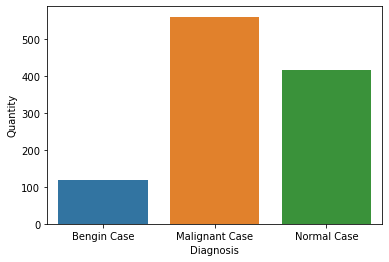

In [69]:
df_metadata = pd.DataFrame({'Diagnosis':['Bengin Case', 'Malignant Case', 'Normal Case'],'Quantity':[120,561,416]})
sns.barplot(data=df_metadata,x = 'Diagnosis',y = 'Quantity')

We can see that there is great imbalance in the number of the malignant cases and bengin ones. Now lets look at the CT scans for all diagnosis groups.

Text(0.5, 1.0, 'Normal Case 3')

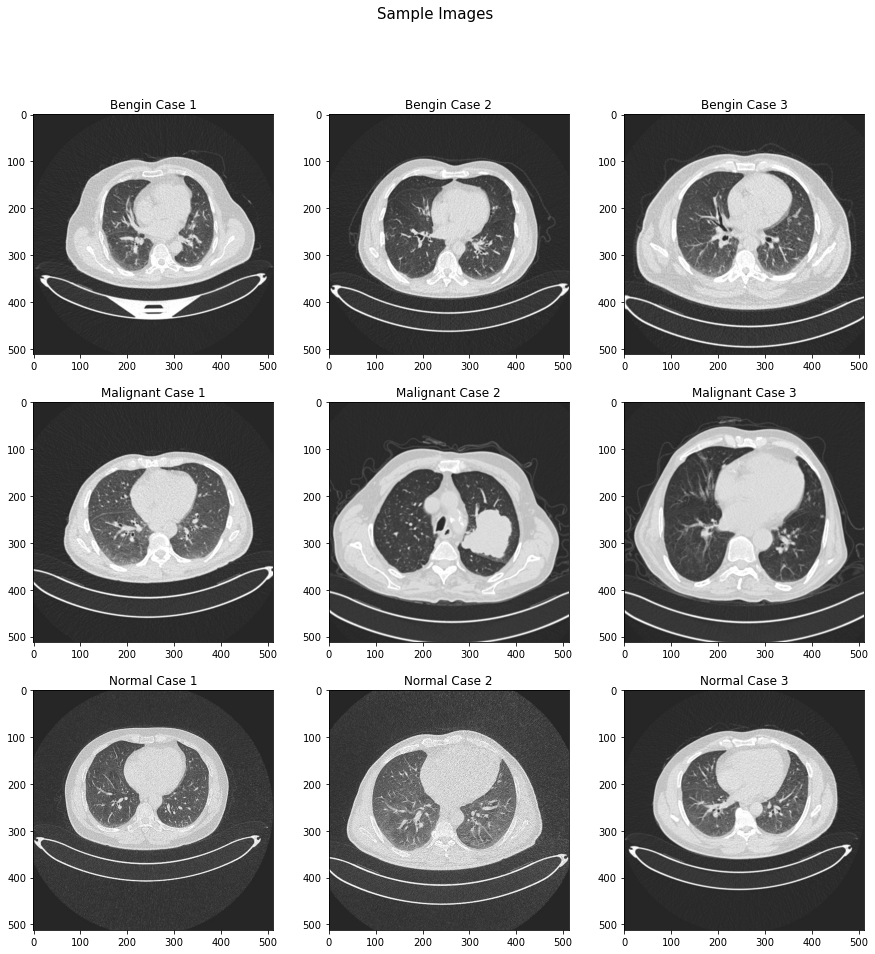

In [70]:
bengin1 = plt.imread('The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (1).jpg')
bengin2 = plt.imread('The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (10).jpg')
bengin3 = plt.imread('The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (30).jpg')
malignant1 = plt.imread('The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (43).jpg')
malignant2 = plt.imread('The IQ-OTHNCCD lung cancer dataset\Malignant cases\Malignant case (300).jpg')
malignant3 = plt.imread('The IQ-OTHNCCD lung cancer dataset\Malignant cases\Malignant case (270).jpg')
normal1 = plt.imread('The IQ-OTHNCCD lung cancer dataset\\Normal cases\\Normal case (100).jpg')
normal2 = plt.imread('The IQ-OTHNCCD lung cancer dataset\\Normal cases\\Normal case (210).jpg')
normal3 = plt.imread('The IQ-OTHNCCD lung cancer dataset\\Normal cases\\Normal case (400).jpg')

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
fig.suptitle('Sample Images',fontsize=15)
axs[0][0].imshow(bengin1)
axs[0][1].imshow(bengin2)
axs[0][2].imshow(bengin3)
axs[0][0].set_title('Bengin Case 1')
axs[0][1].set_title('Bengin Case 2')
axs[0][2].set_title('Bengin Case 3')

axs[1][0].imshow(malignant1)
axs[1][1].imshow(malignant2)
axs[1][2].imshow(malignant3)
axs[1][0].set_title('Malignant Case 1')
axs[1][1].set_title('Malignant Case 2')
axs[1][2].set_title('Malignant Case 3')


axs[2][0].imshow(normal1)
axs[2][1].imshow(normal2)
axs[2][2].imshow(normal3)
axs[2][0].set_title('Normal Case 1')
axs[2][1].set_title('Normal Case 2')
axs[2][2].set_title('Normal Case 3')

For now it is hard to see big differences between the groups. Now we will look at the images with Blue color value set to zero

Text(0.5, 1.0, 'Normal Case 3')

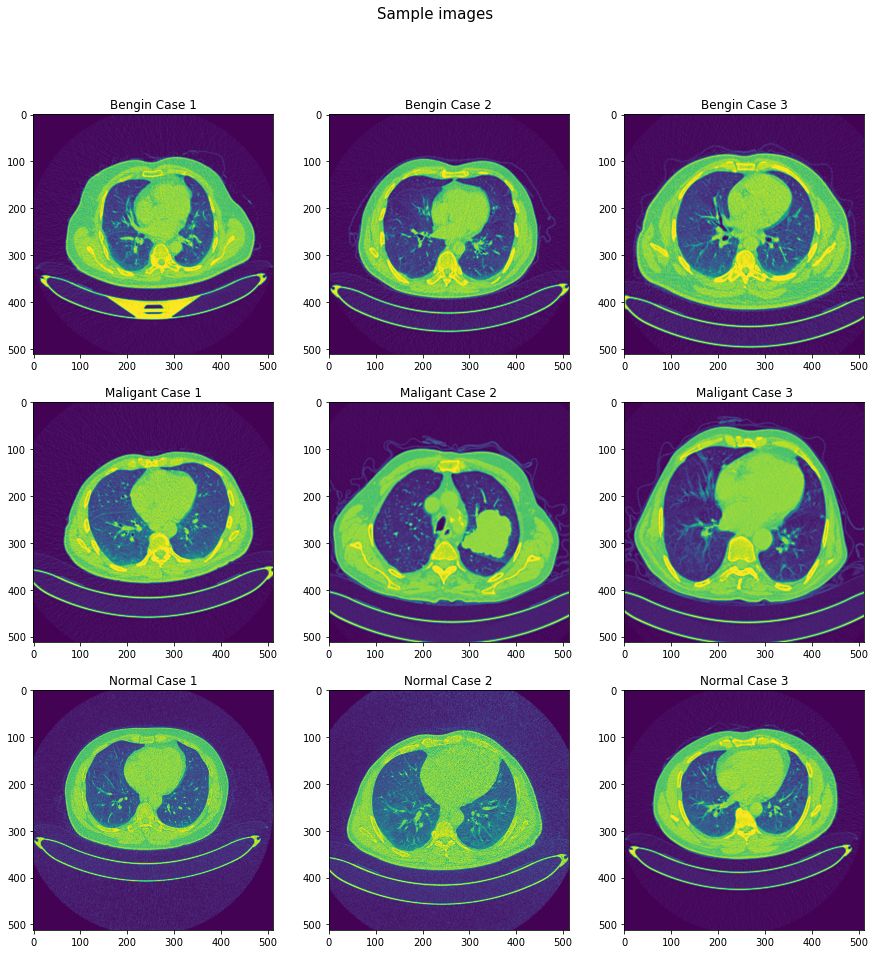

In [71]:
fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
fig.suptitle('Sample images',fontsize=15)
axs[0][0].imshow(bengin1[ : , : , 0])
axs[0][1].imshow(bengin2[ : , : , 0])
axs[0][2].imshow(bengin3[ : , : , 0])
axs[0][0].set_title('Bengin Case 1')
axs[0][1].set_title('Bengin Case 2')
axs[0][2].set_title('Bengin Case 3')

axs[1][0].imshow(malignant1[ : , : , 0])
axs[1][1].imshow(malignant2[ : , : , 0])
axs[1][2].imshow(malignant3[ : , : , 0])
axs[1][0].set_title('Maligant Case 1')
axs[1][1].set_title('Maligant Case 2')
axs[1][2].set_title('Maligant Case 3')

axs[2][0].imshow(normal1[ : , : , 0])
axs[2][1].imshow(normal2[ : , : , 0])
axs[2][2].imshow(normal3[ : , : , 0])
axs[2][0].set_title('Normal Case 1')
axs[2][1].set_title('Normal Case 2')
axs[2][2].set_title('Normal Case 3')

It is still hard to analyze these photos without metadata or background knowledge about CT scans. Next we will check possible image sizes and formats in our dataset.

In [72]:
path1 = 'The IQ-OTHNCCD lung cancer dataset\\Bengin cases'
path2 = 'The IQ-OTHNCCD lung cancer dataset\\Malignant cases'
path3 = 'The IQ-OTHNCCD lung cancer dataset\\Normal cases'
paths = [path1,path2,path3]
shapes = []
formats = []
for path in paths:
    for file in os.listdir(path):
            filepath = os.path.join(path, file)
            shape = plt.imread(filepath).shape
            if shape not in shapes:
                shapes.append(shape)
            formats.append(imghdr.what(filepath))
print(shapes)

[(512, 512, 3), (404, 511, 3), (512, 801, 3), (512, 623, 3), (331, 506, 3)]


In [73]:
formats_df = pd.DataFrame(formats,columns=['format'])
formats_df.value_counts()

format
jpeg      1097
dtype: int64

We can see that we have only .jpeg images in our dataset. We will also look at further information whe can get about the image.

In [91]:
sample = plt.imread('The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (43).jpg')
print('Image Height: {}'.format(sample.shape[0]))
print('Image Width: {}'.format(sample.shape[1]))
print('Image Dimension: {}'.format(sample.shape[2]))

Image Height: 512
Image Width: 512
Image Dimension: 3


## Looking at the 'test' images

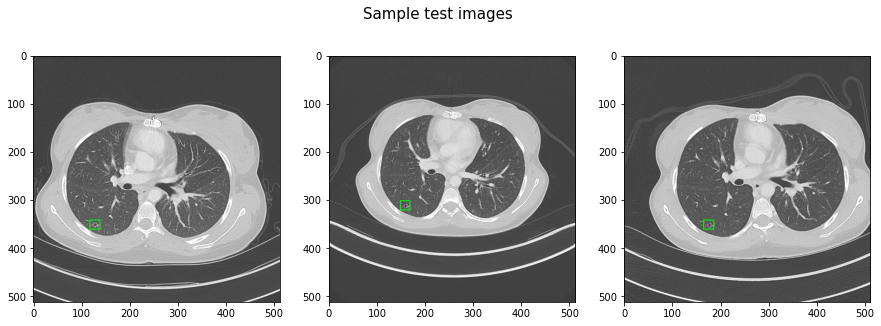

In [75]:
path2 = "Test cases"
files = os.listdir(path2)
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
fig.suptitle('Sample test images',fontsize=15)
for i in range(3): 
    filepath = os.path.join(path2, files[i+20])
    axs[i].imshow(plt.imread(filepath))

We can see bounding boxes and x-marks in this image folder. As for now it is hard to tell how we could use them for the future work on this data set.

# Covid-19 Chest X-Ray data set

Concerns and questions:
* Why there is less fewer CT scans than X-ray images?
* Why some of the X-ray scans are with blue color chanel set to 0?
* Why are there so many different views of the X-ray?
* Why on some of the images there are annotations in form of the arrow?
* Why there aren't any patients with negative pcr result in our data set? Would it not be helpful to compare X-rays of patients with covid and normal cases?

## Exploration of the metadata

In [76]:
metadata_df = pd.read_csv("covid-chestxray-dataset/metadata.csv")
path_covid = 'covid-chestxray-dataset\images'
metadata_df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [77]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

We can get the very specfic information about the patient such as leukocyte or lymphocyte count. However there are only a few rows in our dataset that contain such a information.

**Metadata**

From the data source we can get the list of each metadata field with explanation.

| Attribute | Description |
|------|-----|
| patientid | Internal identifier |
| offset | Number of days since the start of symptoms or hospitalization for each image. If a report indicates "after a few days", then 5 days is assumed. This is very important to have when there are multiple images for the same patient to track progression. |
| sex | Male (M), Female (F), or blank |
| age | Age of the patient in years |
| finding | Type of pneumonia |
| RT_PCR_positive | Yes (Y) or no (N) or blank if not reported/taken |
| survival | Yes (Y) or no (N) or blank if unknown|
| intubated | Yes (Y) if the patient was intubated (or ventilated) at any point during this illness or No (N) or blank if unknown. |
| went_icu | Yes (Y) if the patient was in the ICU (intensive care unit) or CCU (critical care unit) at any point during this illness or No (N) or blank if unknown.|
| needed_supplemental_O2 | Yes (Y) if the patient required supplemental oxygen at any point during this illness or No (N) or blank if unknown |
| extubated | Yes (Y) if the patient was successfully extubated or No (N) or blank if unknown |
| temperature | Temperature of the patient in Celsius at the time of the image|
| pO2 saturation | partial pressure of oxygen saturation in % at the time of the image |
| wbc count | white blood cell count in units of 10^3/uL at the time of the image |
| neutrophil count | neutrophil cell count in units of 10^3/uL at the time of the image |
| lymphocyte count | lymphocyte cell count in units of 10^3/uL at the time of the image |
| view | Posteroanterior (PA), Anteroposterior (AP), AP Supine (APS), or Lateral (L) for X-rays; Axial or Coronal for CT scans. Translations: Bettaufnahme->Supine, Liegend->Supine|
| modality | CT, X-ray, or something else |
| date | Date on which the image was acquired |
| location | Hospital name, city, state, country |
| filename | Name with extension |
| doi | Digital object identifier ([DOI](https://en.wikipedia.org/wiki/Digital_object_identifier)) of the research article |
| url | URL of the paper or website where the image came from |
| license | License of the image such as CC BY-NC-SA. Blank if unknown |
| clinical notes | Clinical notes about the image and/or the patient |
| other notes | e.g. credit |


We will look at the distribution of the important metadata vairables.

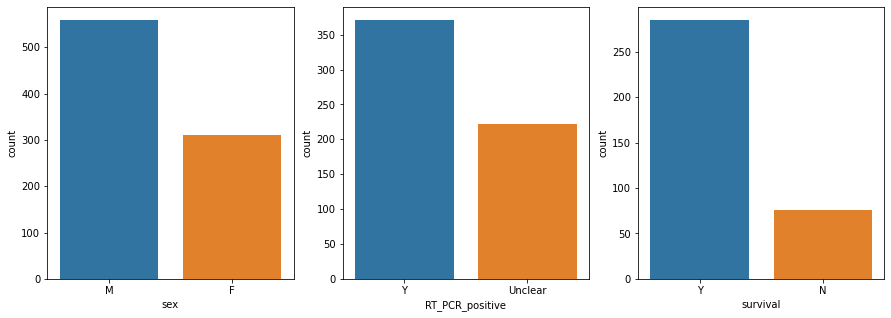

In [78]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
cols = ['sex','RT_PCR_positive','survival']
for i in range(3):
    sns.countplot(data= metadata_df,x=cols[i],ax=axs[i])

From barplots we can see that our data set does not contain patients with negative pcr test results only unclear.

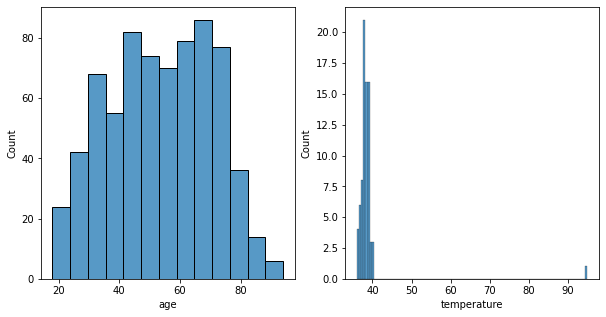

In [79]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
cols = ['age','temperature']
for i in range(2):
    sns.histplot(data= metadata_df,x=cols[i],ax=axs[i])

We can see the outlier that does not make sense.

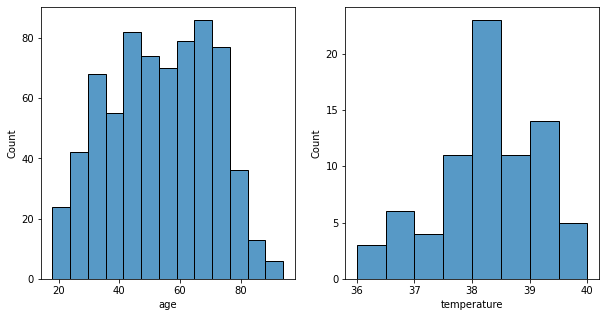

In [80]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
metadata_df = metadata_df.loc[metadata_df['temperature'] != metadata_df['temperature'].max()]
for i in range(2):
    sns.histplot(data= metadata_df,x=cols[i],ax=axs[i])

Now we want to check if the patients with the higher temperature are more likely to have positive test results.

<AxesSubplot:xlabel='RT_PCR_positive', ylabel='temperature'>

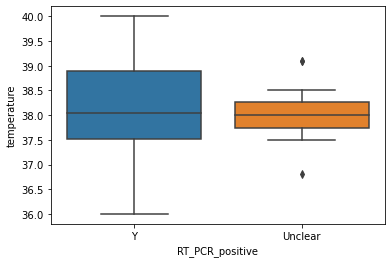

In [81]:
sns.boxplot(data = metadata_df,x = 'RT_PCR_positive',y = 'temperature')

We can see that there is difference in the disitrubtion of temperature in both of the PCR results group. Moreover people with positive result tend to have higher temperature. Lastly we want to look at the sample clinical note for the image in our data set.

In [82]:
metadata_df['clinical_notes'].iloc[5]

'progressive diffuse interstitial opacities and consolidation in the bilateral parahilar areas and lower lung fields'

The clinical notes seem to bring great insight into to analysis of the X-ray images.

## Image Data
From the metadata we can get important information about images in our dataset.

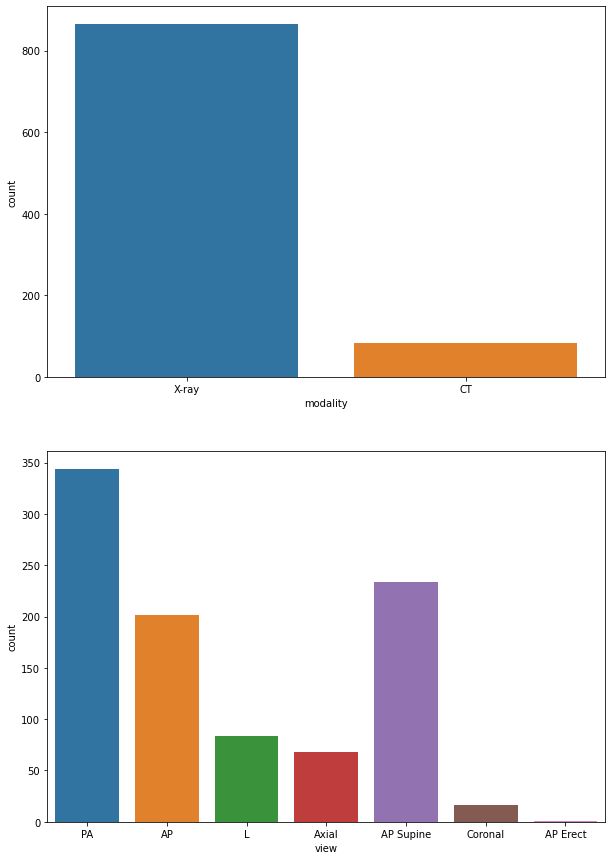

In [83]:
fig, axs = plt.subplots(nrows=2,figsize=(10,15))
cols = ['modality','view']
for i in range(2):
    sns.countplot(data= metadata_df,x=cols[i],ax=axs[i])

We will have a look at the sample X-ray and CT images. Then we will look at the different views and how do they look.

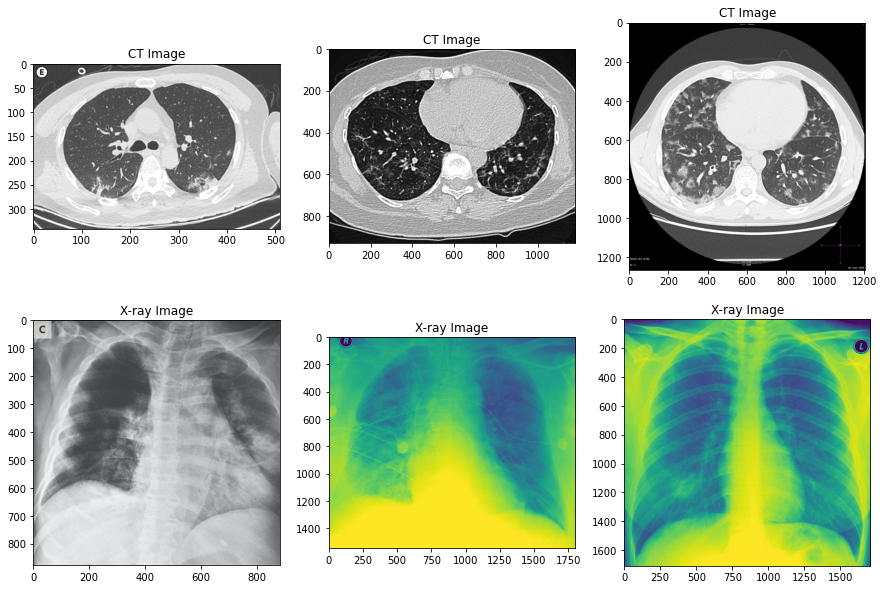

In [84]:
df_CT = metadata_df[metadata_df['modality'] == 'CT'].iloc[[1,5,12]]
df_Xray = metadata_df[metadata_df['modality'] == 'X-ray'].iloc[[2,10,13]]
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
for i in range(3):
    filepathct = os.path.join(path_covid,df_CT.filename.values[i])
    filepathxray = os.path.join(path_covid,df_Xray.filename.values[i])
    axs[0][i].imshow(plt.imread(filepathct))
    axs[0][i].set_title('CT Image')
    axs[1][i].imshow(plt.imread(filepathxray))
    axs[1][i].set_title('X-ray Image')

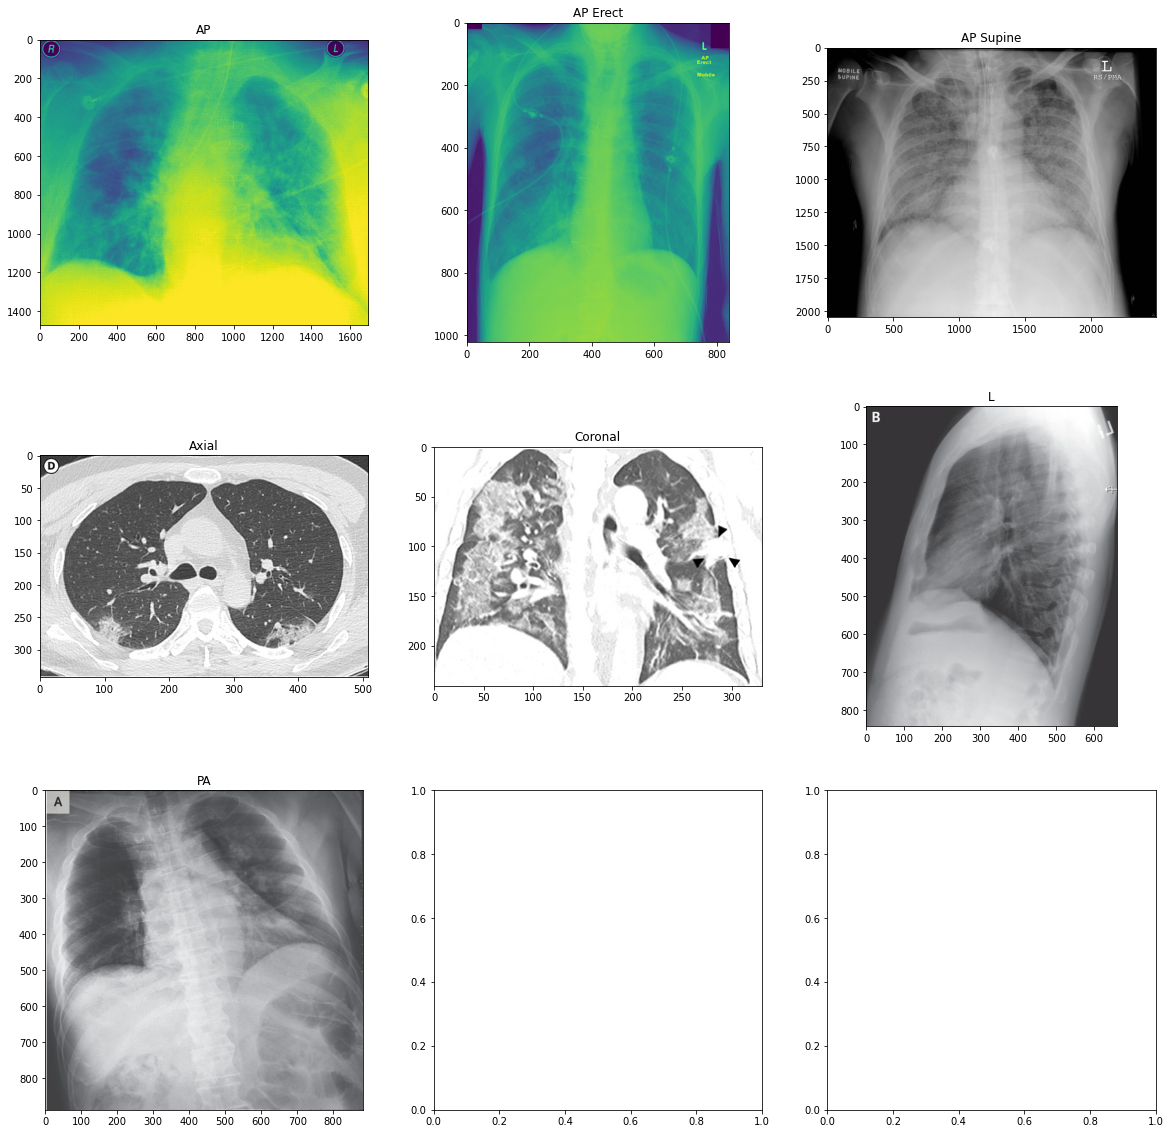

In [85]:
df_views = metadata_df.groupby('view').first()
df_views.filename
fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(20,20))
for i in range(7):
    filepath = os.path.join('covid-chestxray-dataset\images',df_views.filename.values[i])
    axs[i//3][i%3].imshow(plt.imread(filepath))
    axs[i//3][i%3].set_title(df_views.index[i])

Next we can see that we have a lot of different sizes of the photos.

In [86]:
shapes2 = []
formats2 = []
for file in os.listdir(path_covid):
            filepath = os.path.join(path_covid, file)
            shape = plt.imread(filepath).shape
            if shape not in shapes:
                shapes2.append(shape)
            formats2.append(imghdr.what(filepath))
print('Number of different shapes in our dataset: ',len(shapes2))

Number of different shapes in our dataset:  924


In [87]:
formats2_df = pd.DataFrame(formats2,columns=['format'])
formats2_df.value_counts()

format
jpeg      669
png       259
dtype: int64

Luckily there are only two formats in our data set and the majorit tunred out to be .jpeg images. There are also photos with the annotations in the form of the arrows in our dataset.

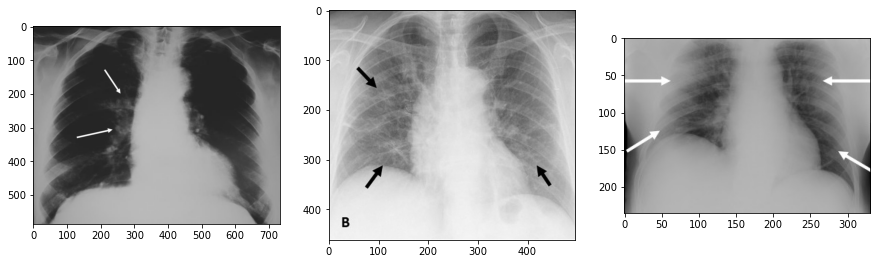

In [88]:
files_arrows = ['000001-9.jpg','1-s2.0-S2387020620301959-gr4_lrg-b.png','1-s2.0-S2531043720300921-gr1.png']
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i in range(3):
    filepath = os.path.join('covid-chestxray-dataset\images',files_arrows[i])
    axs[i].imshow(plt.imread(filepath))

Right know it is really hard to see and understand what the arrows are pointing on. Maybe we can use clinical notes to understand these annotations better. 

['We present the case of a 74 year old man complaining of cough and low grade fever during the last month and a right lung mass on chest X-ray. PA CXR: There is a fairly well-defined opacity projecting adjacent the mediastinum on the right mid lung zone, (white arrows).']


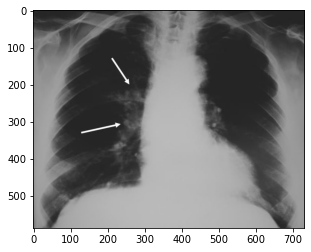

In [89]:
filepath = os.path.join('covid-chestxray-dataset\images','000001-9.jpg')
plt.imshow(plt.imread(filepath))
print(metadata_df[metadata_df.filename == '000001-9.jpg'].clinical_notes.values)

It worked! In our dataset we can also find prepared binary masks marking the lungs.

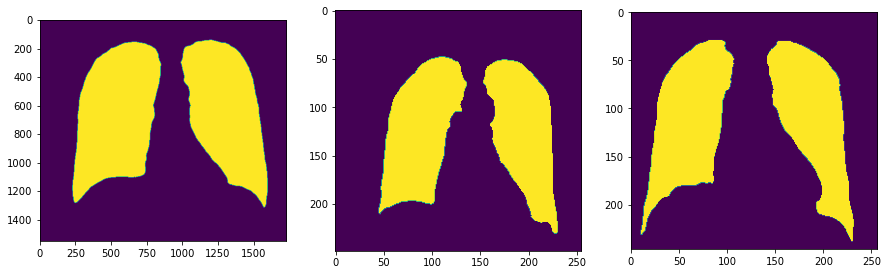

In [90]:
path_masks = 'covid-chestxray-dataset\\annotations\\lungVAE-masks'
files = os.listdir(path_masks)
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i in range(3):
        filepath = os.path.join(path_masks, files[i+50])
        axs[i].imshow(plt.imread(filepath))

# Summary
Both datasets are very different from each other. In the first *IQ-OTH/NCCD-Lung Cancer dataset* we have only CT images in very similar size and in one format. In other *covid-chestxray-dataset* we have all kinds of X-ray views and CT scans images. Moreover most of them seem to be in the different shape and in two file formats: .png and .jpeg.

Another difference between data sets is that the second one includes very comprehensive metadata. From that we could get information not only about age or sex of the patient but even clinical notes for the images in some cases. 

In *IQ-OTH/NCCD-Lung Cancer dataset* higher number of the malignant cases over the bengin cases rases a concern. This data set also contains test cases with bounding-boxes and x-marks on the CT images. Perhaps they might become useful during classification. 

In  *covid-chestxray-dataset* some of the images have annotations in form of the arrows. Moreover in this data set we have got the folder with images of masks that are marking the lungs. This might be helpful in further working on segmentation problem on this data set. 